Benchmarking SqPO rewriting with Neo4j
======================================



Types of rules
----------------
- Single transformation rules (given a node/edge a single clone/merge/add)
- Random rules with uniformly chosen operations (variable size of a lhs/number of operations)
- Rules extracted from the real-world dataset


Types of graphs
-----------------

#### Synthetic graphs


* Complete graph (Networkx's implementation)
 https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.classic.complete_graph.html#networkx.generators.classic.complete_graph

* Directed scale-free graph (Networkx's implementation)

 **TODO:** investigate generation parameters $\alpha$, $\beta$, $\gamma$.
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.directed.scale_free_graph.html#networkx.generators.directed.scale_free_graph


References
-----------


* Benchmarking for Graph Transformation, Gergely Varr, Andy Schurr, Daniel Varr
  http://www.cs.bme.hu/~gervarro/publication/TUB-TR-05-EE17.pdf

* B. Bollobás, C. Borgs, J. Chayes, and O. Riordan, Directed scale-free graphs, Proceedings of the fourteenth annual ACM-SIAM Symposium on Discrete Algorithms, 132–139, 2003.



In [8]:
import os

import pickle
import networkx as nx

from benchmark_utils import *

## Mean elapsed time to perform a single operation

### Complete directed graphs

In [9]:
with open("pickles/logspaced_cliques.pickle", "rb") as f:
    (clique_ns, logspaced_cliques) = pickle.load(f)

In [10]:
# clique_stats = {
#     "neo4j": {},
#     "nx": {}
# }
# individual_benchmark(clique_stats, logspaced_cliques, 5)
# with open("clique_stats_large.pickle", "wb") as f:
#     pickle.dump((clique_ns, clique_stats), f)

In [11]:
with open("pickles/clique_stats_large.pickle", "rb") as f:
    clique_ns, clique_stats = pickle.load(f)

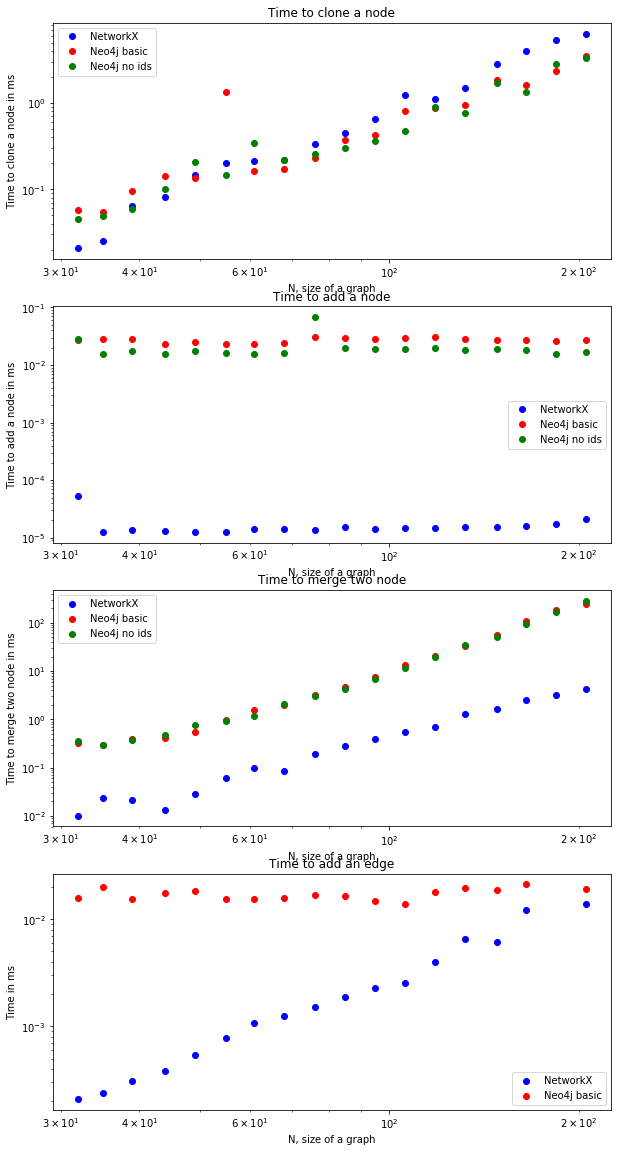

In [12]:
plot_stat(clique_stats, clique_ns, log=True)

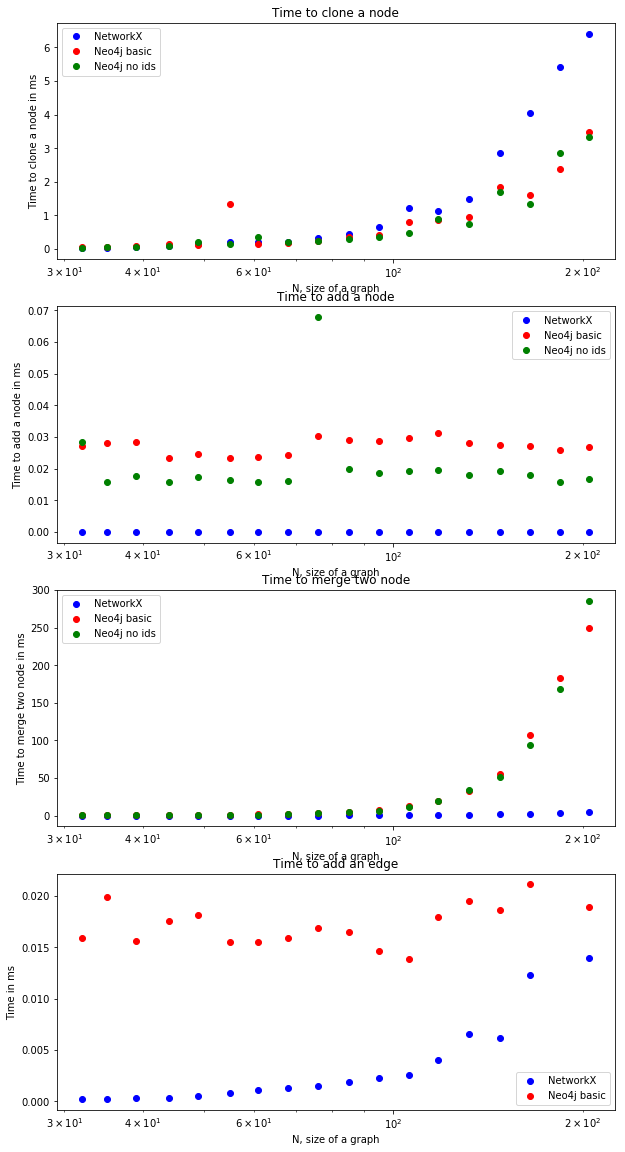

In [13]:
plot_stat(clique_stats, clique_ns)

### Scale-free graphs (fixed params ($\alpha=0.41$, $\beta=0.54$, $\gamma=0.05$), various size)

In [14]:
graphs = []
for filename in os.listdir("scale_free"):
    with open("scale_free/" + filename, "rb") as f:
        g = pickle.load(f)
        if len(g.nodes()) > 40:
            graphs.append(g)
scale_free_ns = [len(g.nodes()) for g in graphs]

In [1]:
# scale_free_stats = {
#     "neo4j": {},
#     "nx": {}
# }

# individual_benchmark(scale_free_stats, graphs, 10)
# with open("scale_free_stats_large.pickle", "wb") as f:
#     pickle.dump((scale_free_ns, scale_free_stats), f)

In [15]:
with open("scale_free_stats_large.pickle", "rb") as f:
    scale_free_ns1, scale_free_stats = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'scale_free_stats_large.pickle'

In [ ]:
plot_stat(scale_free_stats, scale_free_ns, log=True)

In [ ]:
plot_aggregated_stat(scale_free_stats, scale_free_ns, log=True)